In [4]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Reading the dataset
df = pd.read_csv('/content/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
#Checking information about the Data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
#Checking for duplicates
df.duplicated().sum()

0

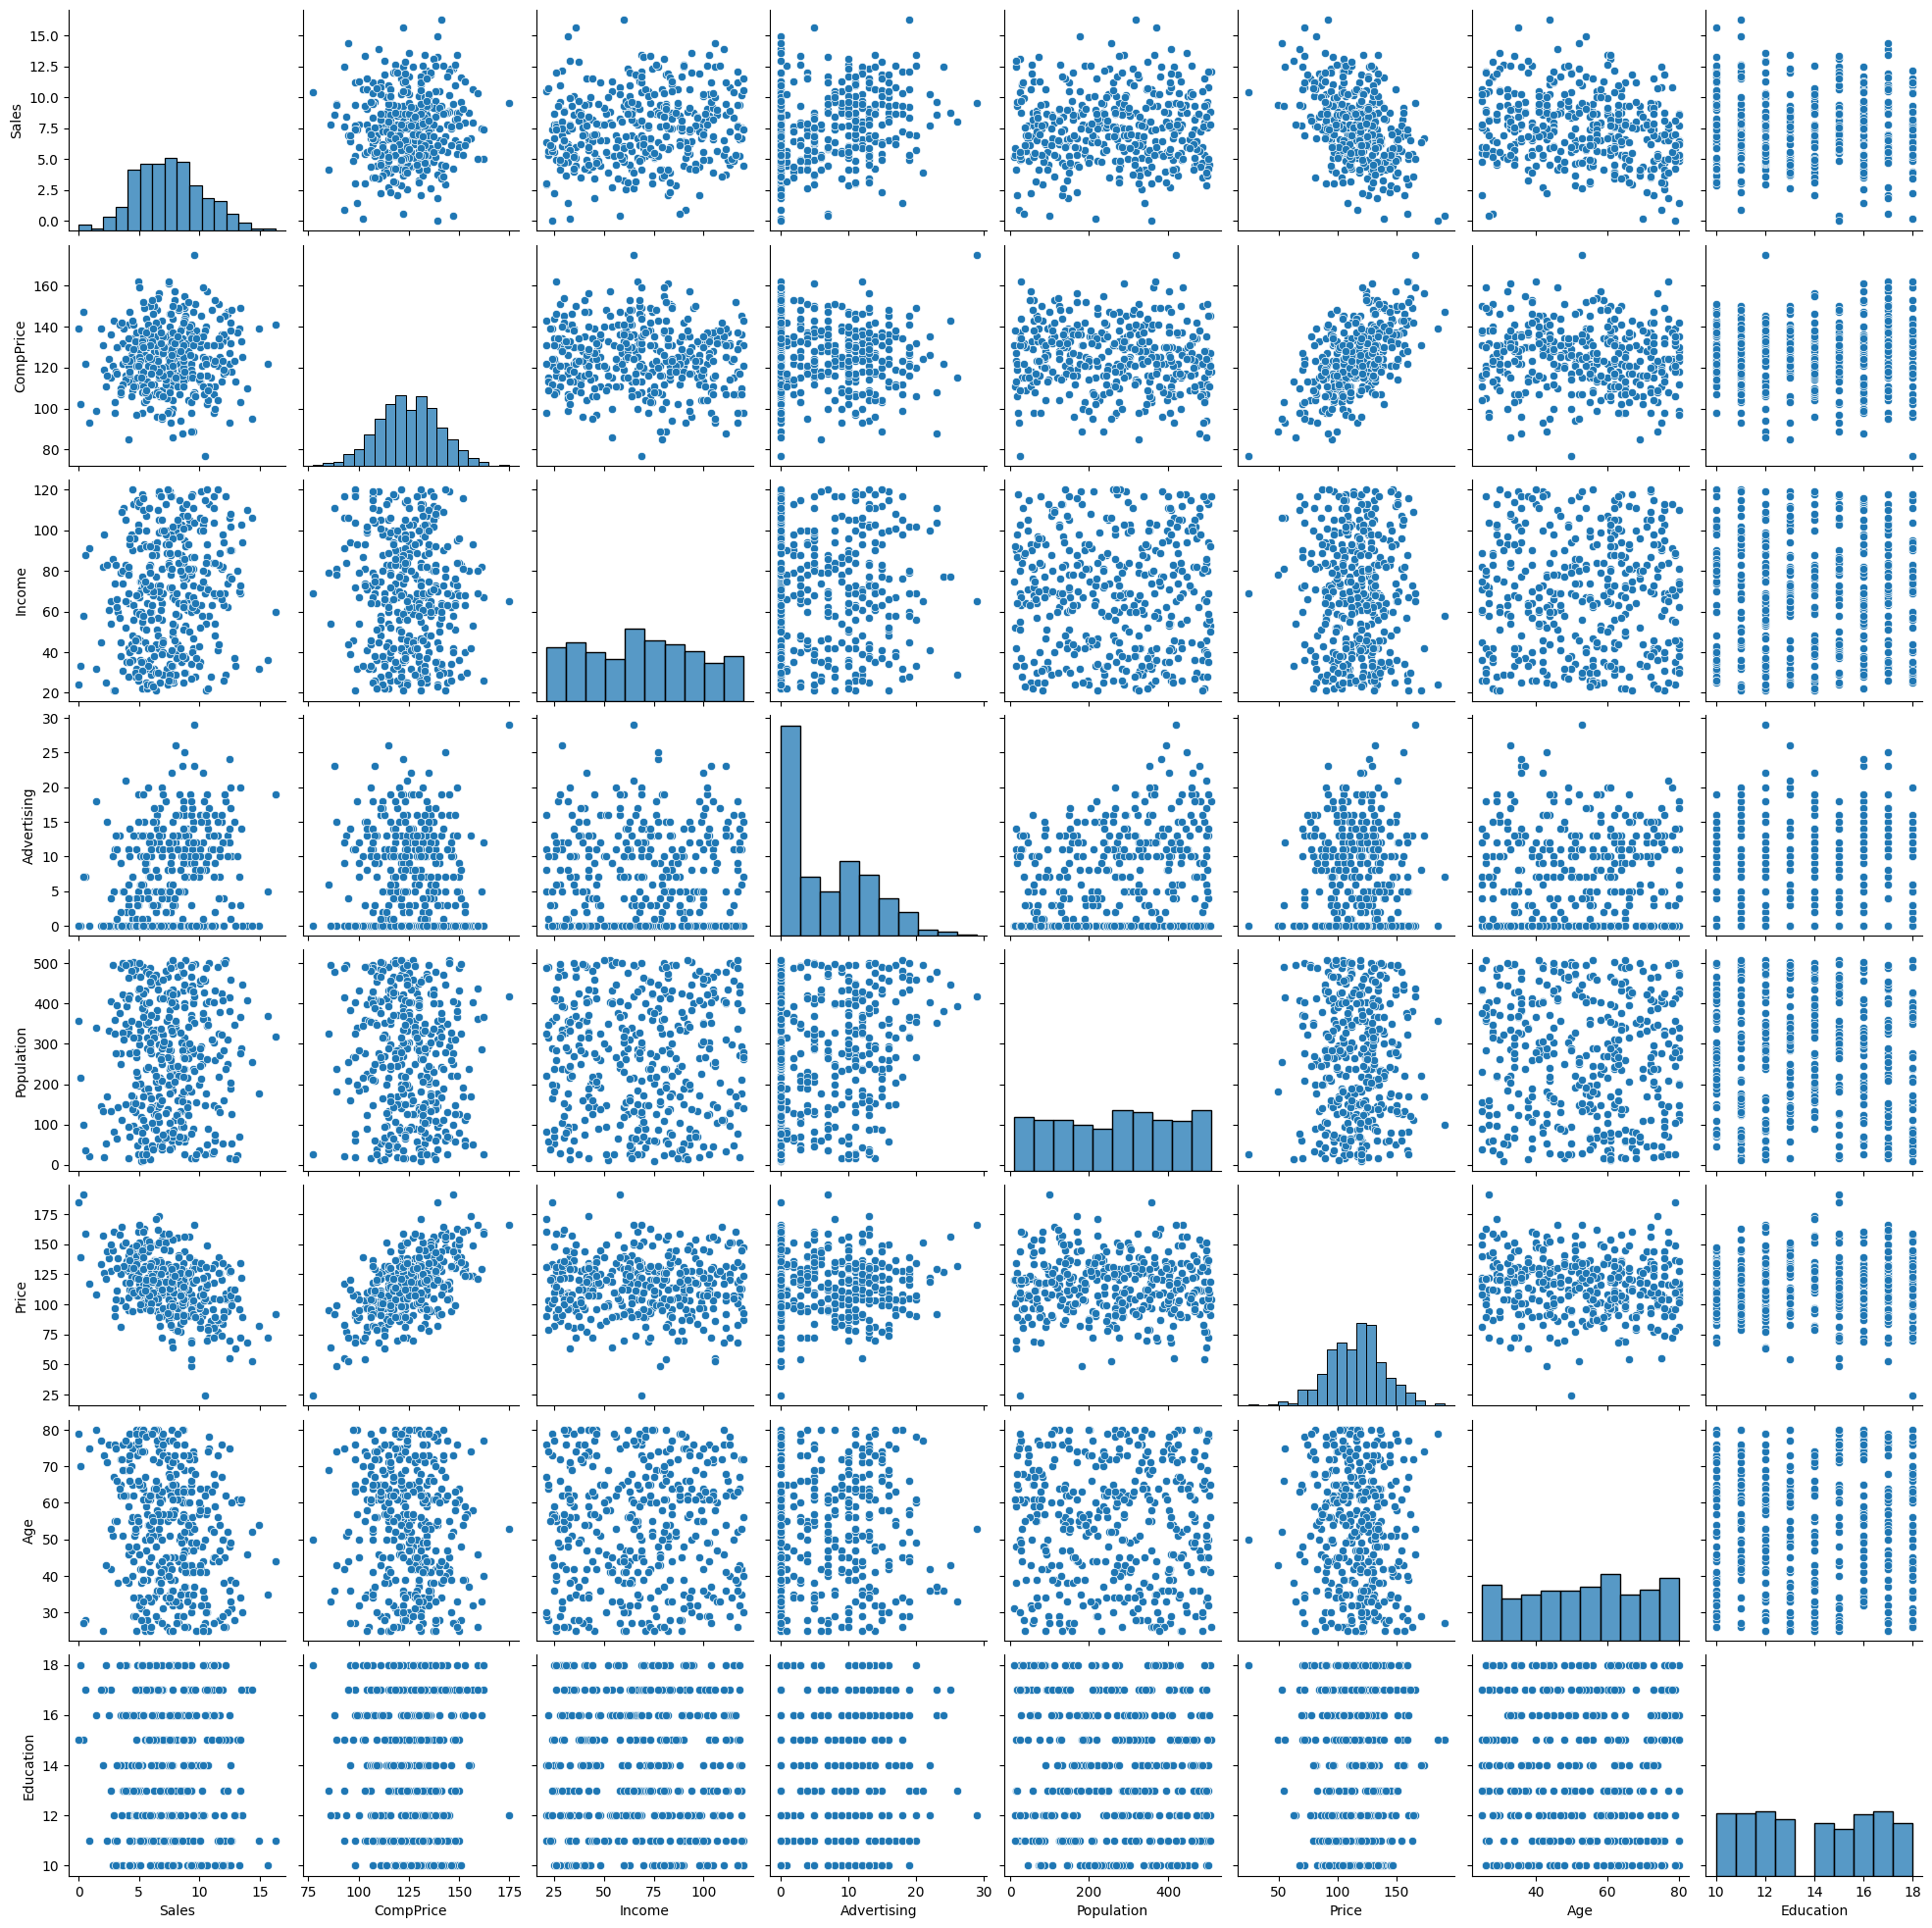

In [8]:
#Checking the distribution of the data for each attribute
sns.pairplot(df)
plt.show()

In [9]:
#Converting the categorical variables to numerical
le = LabelEncoder()
for col in ['ShelveLoc', 'Urban', 'US']:
  df[col]= le.fit_transform(df[col])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [11]:
#Calculating value of company based on the mean value and assigning 1 i.e. Low value Company where the value if less than the mean of Sales
#and 0 i.e. High Value Company where the value is greater than the mean of Sales.
Company_Value = []
for i in df['Sales']:
  if i <= df['Sales'].mean():
    Company_Value.append(1)
  else:
    Company_Value.append(0)

In [12]:
#Adding Company Value to the dataframe
df['Company_Value'] = Company_Value
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Company_Value
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [13]:
#Splitting the data inton x and y variables
x = df.drop(['Company_Value', 'Sales'], axis = 1)
y = df['Company_Value']

In [14]:
#Splitting the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state =71)

In [15]:
#Intializing the Decision Tree model
model = DecisionTreeClassifier()

In [16]:
#Creating a parameter dictionary for GridSearchCV
params = {'criterion': ["entropy", "gini"], 'splitter': ['best', 'random'],
          'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10],
          'min_samples_leaf' : [1, 2, 3, 4],
          'max_features': ['auto', 'sqrt', 'log2', None]}

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Creating a GridSearchCV model to find the best parameters
grid = GridSearchCV(model, params)

In [21]:
#Fitting the model with training set
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
#printing the best score and parameters from the grid search model
print(grid.best_score_)
print(grid.best_params_)

0.7571428571428571
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [23]:
#using the best parameters to fit the model
grid.best_estimator_

DecisionTreeClassifier(min_samples_leaf=3)

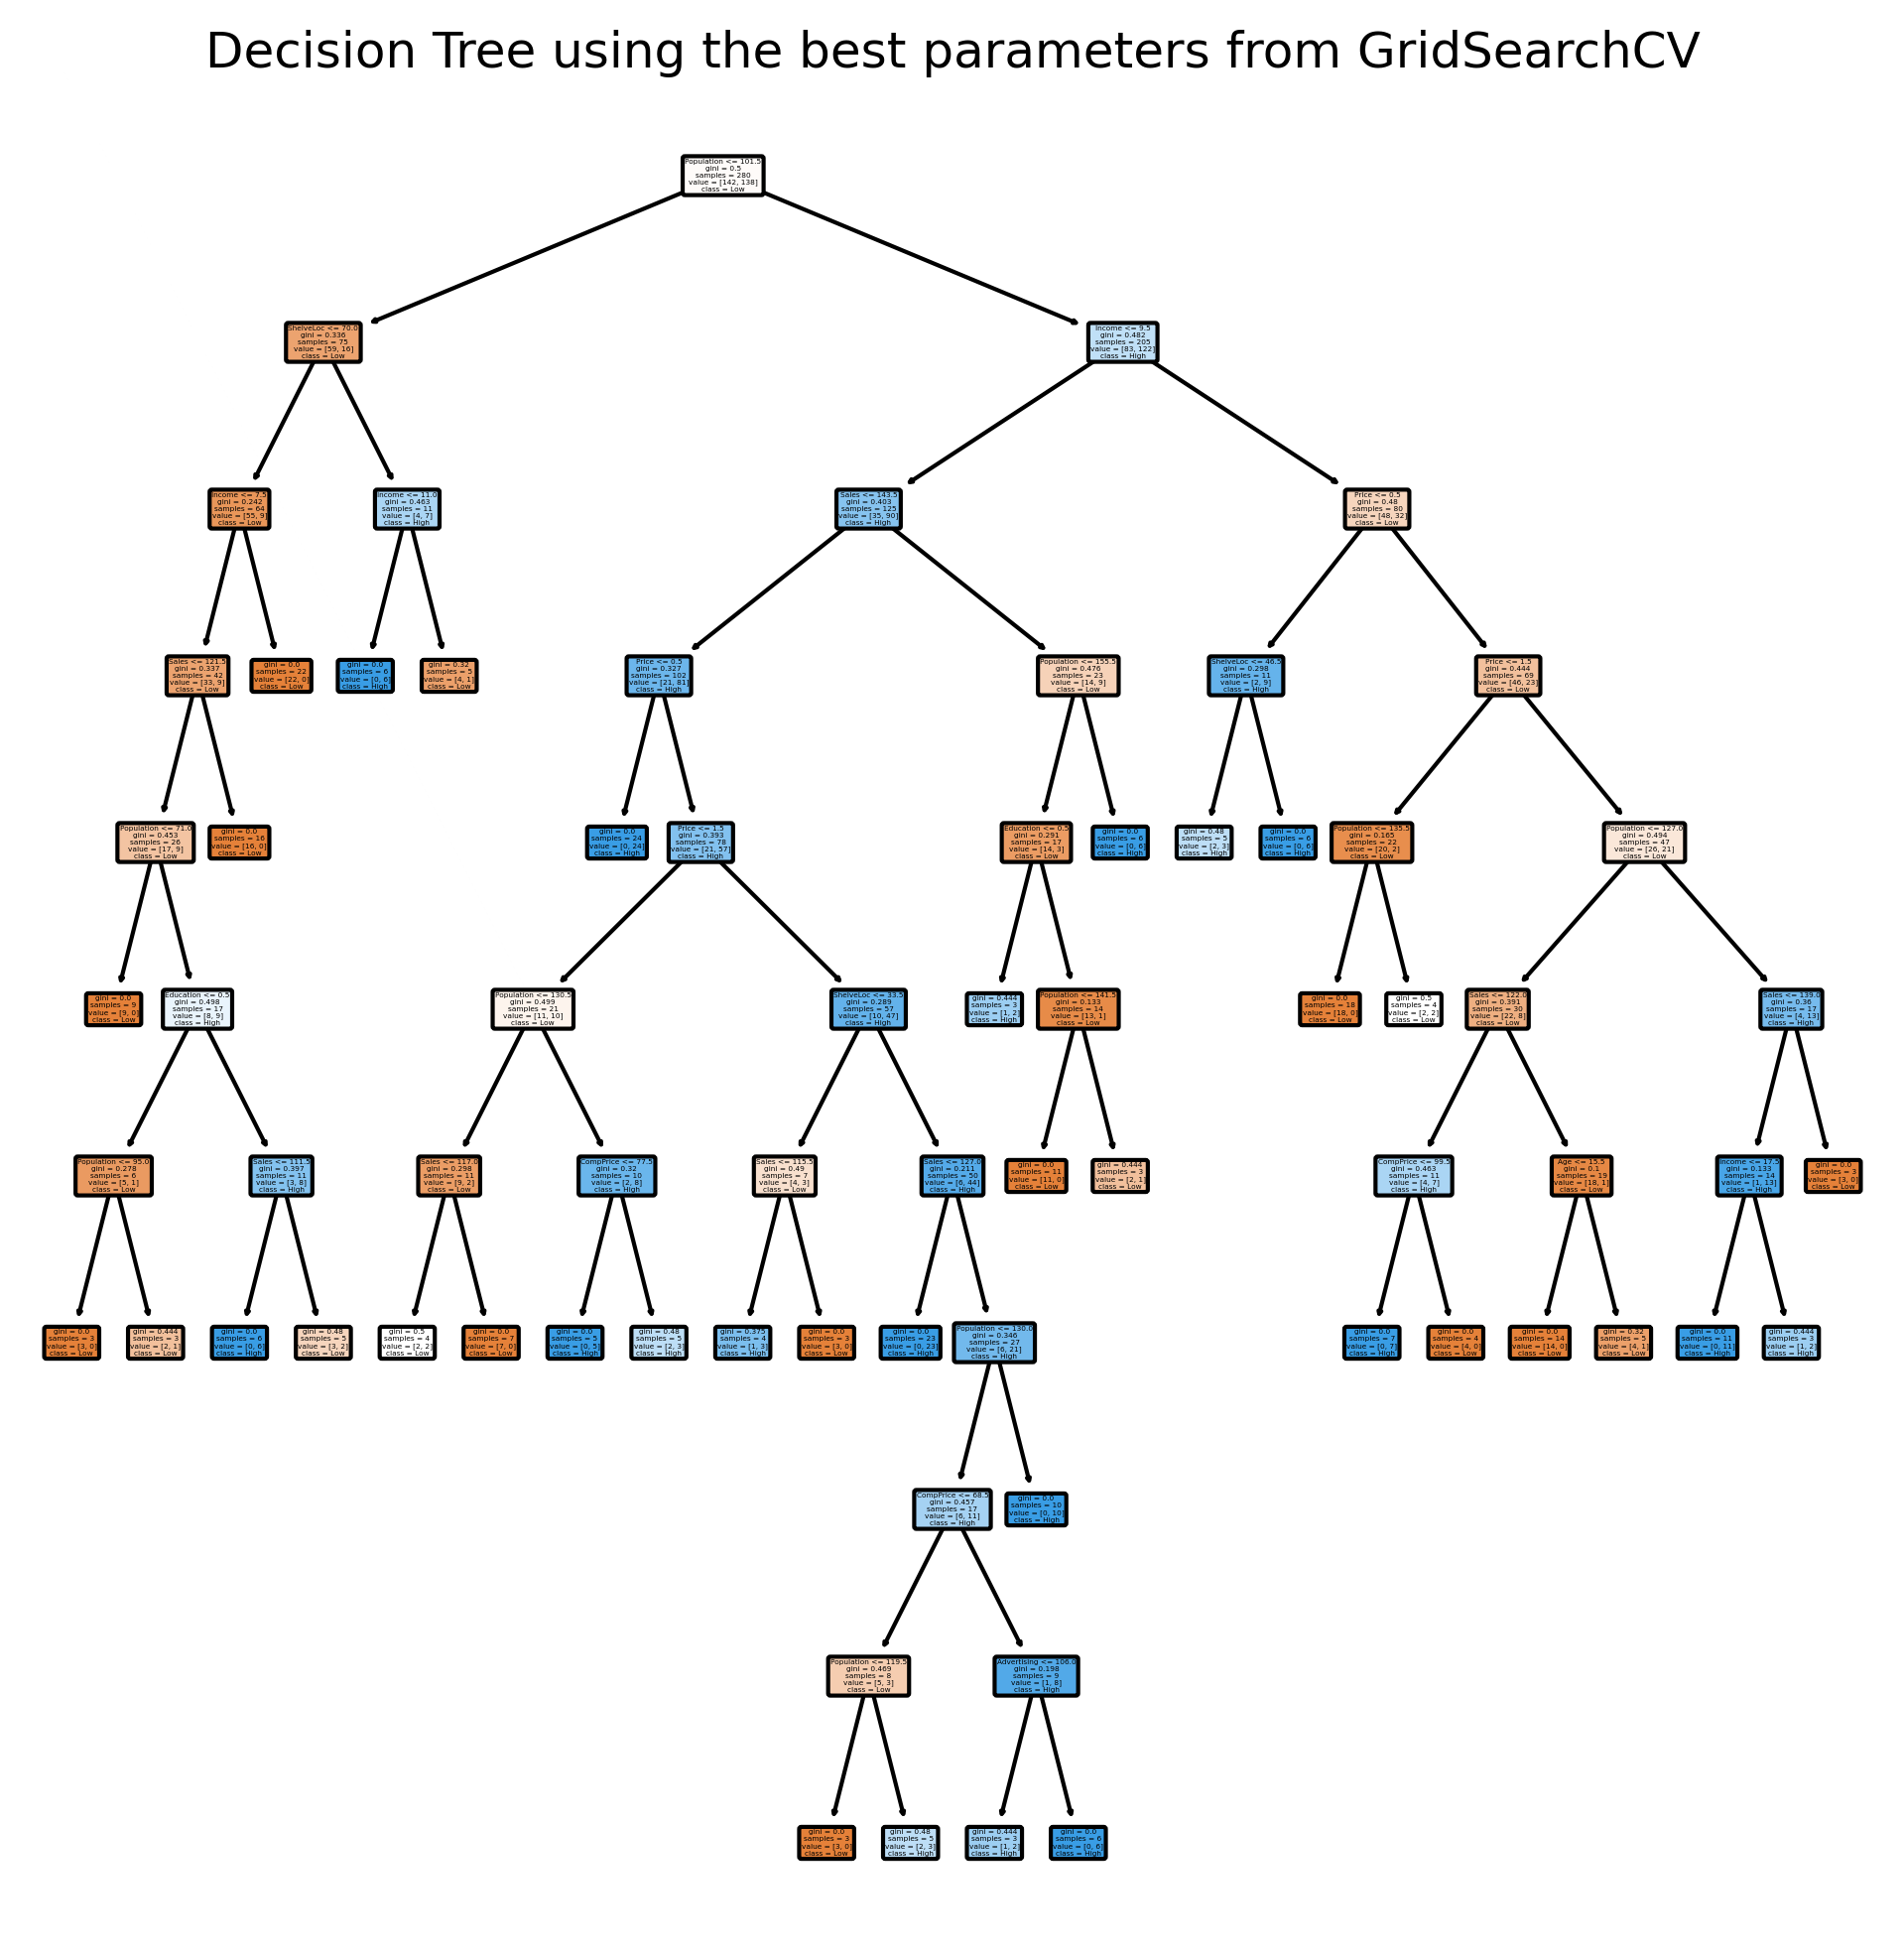

In [26]:
#plotting the Decision Tree plot using the GridSearchCV's Best parameters
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8), dpi = 300)
fn = df.columns
cn = ['Low', 'High']
tree.plot_tree(grid.best_estimator_, feature_names = fn, class_names = cn, filled = True, rounded = True, ax = axes)
plt.title('Decision Tree using the best parameters from GridSearchCV')
plt.savefig('Decision_Tree(Company Data).pdf')
plt.show()